In [12]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, isdir, join
#from scipy.misc import imread
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import numpy.random as rng
#import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle 
import pandas as pd

In [13]:
data_path = "/home/zithubai/Desktop/ZitHubai"


In [22]:
train_path = os.path.join(data_path, 'images_background')
New_xtrain = os.path.join (data_path, 'images') 
#validation_path = os.path.join(data_path, 'images_evaluation')

In [69]:
#def load_images_from_directory(path1):

#load alphabet separately and append that to tensor 
#This forloop will be usefull when training mult decision trees
alphabet_folder_list = [f for f in listdir(train_path) if isdir(join(train_path, f))]
alphabet_folder_list.sort()
alphabet_folder_list_test = [f1 for f1 in listdir(New_xtrain) if isdir(join(New_xtrain, f1))]

alphabet_folder_list_test.sort()
print(alphabet_folder_list)
print(alphabet_folder_list_test)
#Dictionary to store model perfomance score 
Dict_score = {keys: [] for keys in alphabet_folder_list_test}

#print("length of alphabet list", alphabet_folder_list)
for alphabet, alphabet_new in zip(alphabet_folder_list, alphabet_folder_list_test):
    print(alphabet, alphabet_new)
    Ytrain = []
    Xtrain = []
    X_new = []
    Y_new = []
    alph_list = []
    alph_list_new = []
    letter_class = []
    letter_class_new = []

    alphabet_path = os.path.join(train_path, alphabet)
    alphabet_path_new = os.path.join(New_xtrain, alphabet_new)
    print("alphabet_path, alphabet_path_new", alphabet_path, alphabet_path_new)
    alph_list.append(alphabet_path)
    alph_list_new.append(alphabet_new)

    character_folder_list = [cf for cf in listdir(alphabet_path) if isdir(join(alphabet_path, cf))]
    character_folder_list.sort()
    print ("char f list", len(character_folder_list))
    
    character_folder_list_new = [cf1 for cf1 in listdir(alphabet_path_new) if isdir(join(alphabet_path_new, cf1))]
    character_folder_list_new.sort()
    print ("char f1 list", len(character_folder_list_new))
    
    #each character in alphabet is in different folder (char0, char1, ...)
    category_labels = []
    category_labels_new = []
    F_name = []
    F_name_new = []
    
    #count = len(join(alphabet_path, char))
    for j,char in enumerate(character_folder_list):
        print("J is", j, char)
        character_folder_path = join(alphabet_path, char) 
        print("char folder path is", character_folder_path)
        count = len( listdir(character_folder_path))

        print ("counts is ", count)

        letter_class.append(char)
        catergory_images = []
        category_labels.append(np.repeat(j,count))

        if not isdir(character_folder_path):
            continue 

        #read every image in this directory (char0, char1, ...)

        image_list =  [ img for img in listdir(character_folder_path) if (isfile(join(character_folder_path,img)) and img[0] != '.')]

        for filename in image_list:
            F_name.append(filename)
            image_path = join(character_folder_path, filename)
            image = imread(image_path)

            #image preprocessing 
            image = image/255
            image = 1- image

            catergory_images.append(image)

        try:
            Xtrain.append(np.stack(catergory_images))

        #edgecase - last one 
        except ValueError as e:
            #print ("error - category_images:", catergory_images)
            print ("error - category_images:")

    Ytrain.append(np.stack(category_labels))
    Xtrain = np.stack(Xtrain)
    Ytrain = np.stack(Ytrain)
    new_Xtrain = Xtrain.reshape([Xtrain.shape[0]*Xtrain.shape[1], 105*105])
    new_ylabel = Ytrain.reshape(Ytrain[0].shape[0]*Ytrain[0].shape[1])
    print(new_Xtrain.shape)
    print(new_ylabel.shape)
    
    
    for jj,char2 in enumerate(character_folder_list_new):
        print("JJ is", jj, char2)
        character_folder_path_new = join(alphabet_path_new, char2) 
        print("char2 folder path is", character_folder_path_new)
        count_new = len( listdir(character_folder_path_new))


        letter_class_new.append(char2)
        catergory_images_new = []
        category_labels_new.append(np.repeat(jj,count_new))

        if not isdir(character_folder_path_new):
            continue 

        image_list_new =  [ img for img in listdir(character_folder_path_new) if (isfile(join(character_folder_path_new,img)) and img[0] != '.')]

        for filename_new in image_list_new:
            F_name_new.append(filename_new)
            image_path_new = join(character_folder_path_new, filename_new)
            image_new = imread(image_path_new)

            #image preprocessing 
            image_new = image_new/255
            image_new = 1- image_new

            catergory_images_new.append(image_new)

        try:
            X_new.append(np.stack(catergory_images_new))

        #edgecase - last one 
        except ValueError as e:
            #print ("error - category_images:", catergory_images)
            print ("error - category_images:")

    Y_new.append(np.stack(category_labels_new))
    X_new = np.stack(X_new)
    Y_new = np.stack(Y_new)
    new_X = X_new.reshape([X_new.shape[0]*X_new.shape[1], 105*105])
    new_Y = Y_new.reshape(Y_new[0].shape[0]*Y_new[0].shape[1])

    print(new_X.shape)
    print(new_Y.shape)


    #train_pct_index = int(0.2 * len(Xtrain))
    #X_train, X_test = Xtrain[:train_pct_index], Xtrain[train_pct_index:]
    #y_train, y_test = ytrain[:train_pct_index], ytrain[train_pct_index:]  

    #Randomized search parameter optimization
    #grid = {"max_features":["log2", "sqrt","auto"], "criterion": ["entropy", "gini"], "min_samples_leaf":np.arange(3, 50, 5)}
    #DC_model = RandomForestClassifier(min_samples_leaf=5)
    #DC_model = RandomForestClassifier()

    #DC_model= RandomizedSearchCV(DecisionTreeClassifier(random_state = 0)
    #                        ,param_distributions = grid
    #                         ,cv = 10, n_iter=int(50)
    #                          ,n_jobs=-1, random_state = 0)
    
    
    
    #grid = {"n_estimators":np.arange(100, 500, 20)
    #      ,"max_features":["log2", "sqrt","auto"]
    #      ,"max_depth":np.arange(5, 50, 5)
    #      ,"min_samples_leaf":np.arange(3, 50, 5)}
    
    grid = {"n_estimators":np.arange(10,100 , 20)
          ,"min_samples_leaf":np.arange(10, 50, 5)}

    #Randomized search parameter optimization 
    DC_model = RandomizedSearchCV(RandomForestClassifier(random_state = 0, oob_score = 0)
                          ,param_distributions = grid
                          ,cv = 15, n_iter=20
                          ,n_jobs=-1, random_state = 0)
    DC_model.fit(new_Xtrain, new_ylabel)
        
    
    y_pred =  DC_model.predict(new_X)
    #save the model to disk
    filename_save = alphabet_new +'.sav'
    pickle.dump(DC_model, open(filename_save, 'wb'))


    classes_new = np.array(letter_class_new)
    score2 = accuracy_score(y_pred, new_Y)
    print ("score is", score2)
    
    
    Dict_score[alphabet_new].append(score2)


    L = len(np.where(new_Y != y_pred)[0]) 

    print("############################ len of predicted is is ####################", L)
    
    
    #Alpha_name = listdir(train_path)
    F_name_new = np.array(F_name_new)
    
    #size = np.arange(0, len(F_name))

    #difference = np.setdiff1d(size, rotated_only)

    #reduced_original = F_name[difference]

    #new_y_pred = y_pred[difference]

    print("classes", classes_new[y_pred])

    #creat dictionary with index image per class
    Dictionary_idx = {keys: [] for keys in classes_new}


    for i,j in Dictionary_idx.items():
        #print (i)
        Dictionary_idx[i].append(np.where(classes_new[y_pred] == i))


    #convert and save images into different classes from y_pred
    Dict_nimages = {keys: [] for keys in classes_new}

    for i,j in Dict_nimages.items():
        Dict_nimages[i].append(np.shape(np.where(classes_new[y_pred] == i))[1])
    print("Dict_nimages", Dict_nimages)


    for j,k in Dict_nimages.items():
        #print("k is", k)
        kk =  str(j)
        rot_character_path = join(character_folder_path, kk)

        if not os.path.exists(rot_character_path):
            os.makedirs(rot_character_path)

        #print("Here is char path", char_path)
        for im in range(k[0]):
            im_arr = new_X[np.ravel(Dictionary_idx[j])[im]].reshape(105,105)
            im_arr = im_arr.astype(np.uint8)
            
            im_arr = 255 + im_arr
            arr_im = Image.fromarray(im_arr)
            #arr_im = arr_im.convert("RGB")
            #arr_im.save(os.path.join(path, 'Alphabet_of_Magic'+str(np.ravel(Dictionary_idx[j])[im])), format= 'png')
            #arr_im.save(os.path.join(store_path, char_path, reduced_original[im]))
            arr_im.save(join(character_folder_path, kk,F_name_new[im]))
            
dataframe = pd.DataFrame(Dict_score)
dataframe.to_csv("Accuracy_omniglot.csv")

['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)', 'Balinese', 'Bengali', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Braille', 'Burmese_(Myanmar)', 'Cyrillic', 'Early_Aramaic', 'Futurama', 'Grantha', 'Greek', 'Gujarati', 'Hebrew', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Japanese_(hiragana)', 'Japanese_(katakana)', 'Korean', 'Latin', 'Malay_(Jawi_-_Arabic)', 'Mkhedruli_(Georgian)', 'N_Ko', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Sanskrit', 'Syriac_(Estrangelo)', 'Tagalog', 'Tifinagh']
['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)', 'Balinese', 'Bengali', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Braille', 'Burmese_(Myanmar)', 'Cyrillic', 'Early_Aramaic', 'Futurama', 'Grantha', 'Greek', 'Gujarati', 'Hebrew', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Japanese_(hiragana)', 'Japanese_(katakana)', 'Korean', 'Latin', 'Malay_(Jawi_-_Arabic)', 'Mkhedruli_(Georgian)', 'N_Ko', 'Oji

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.678125
############################ len of predicted is is #################### 515
classes ['character17' 'character01' 'character01' ... 'character03' 'character13'
 'character19']
Dict_nimages {'character01': [107], 'character02': [90], 'character03': [91], 'character04': [132], 'character05': [113], 'character06': [48], 'character07': [41], 'character08': [54], 'character09': [66], 'character10': [178], 'character11': [39], 'character12': [46], 'character13': [87], 'character14': [71], 'character15': [67], 'character16': [34], 'character17': [106], 'character18': [112], 'character19': [99], 'character20': [19]}
Anglo-Saxon_Futhorc Anglo-Saxon_Futhorc
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Anglo-Saxon_Futhorc /home/zithubai/Desktop/ZitHubai/images/Anglo-Saxon_Futhorc
char f list 29
char f1 list 29
J is 0 character01
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Anglo-Saxon_Futhorc/character01
counts is  1

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7232758620689655
############################ len of predicted is is #################### 642
classes ['character01' 'character01' 'character19' ... 'character21' 'character29'
 'character29']
Dict_nimages {'character01': [56], 'character02': [99], 'character03': [97], 'character04': [71], 'character05': [47], 'character06': [125], 'character07': [52], 'character08': [70], 'character09': [71], 'character10': [105], 'character11': [147], 'character12': [72], 'character13': [50], 'character14': [119], 'character15': [57], 'character16': [65], 'character17': [45], 'character18': [80], 'character19': [64], 'character20': [46], 'character21': [95], 'character22': [62], 'character23': [91], 'character24': [110], 'character25': [60], 'character26': [87], 'character27': [55], 'character28': [123], 'character29': [99]}
Arcadian Arcadian
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Arcadian /home/zithubai/Desktop/ZitHubai/images/Arcadian
char f li

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6927884615384615
############################ len of predicted is is #################### 639
classes ['character01' 'character01' 'character01' ... 'character26' 'character26'
 'character26']
Dict_nimages {'character01': [79], 'character02': [97], 'character03': [131], 'character04': [72], 'character05': [59], 'character06': [158], 'character07': [53], 'character08': [69], 'character09': [34], 'character10': [76], 'character11': [54], 'character12': [69], 'character13': [53], 'character14': [81], 'character15': [163], 'character16': [72], 'character17': [83], 'character18': [71], 'character19': [64], 'character20': [57], 'character21': [102], 'character22': [70], 'character23': [63], 'character24': [44], 'character25': [134], 'character26': [72]}
Armenian Armenian
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Armenian /home/zithubai/Desktop/ZitHubai/images/Armenian
char f list 41
char f1 list 41
J is 0 character01
char folder path is /ho

JJ is 23 character24
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Armenian/character24
JJ is 24 character25
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Armenian/character25
JJ is 25 character26
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Armenian/character26
JJ is 26 character27
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Armenian/character27
JJ is 27 character28
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Armenian/character28
JJ is 28 character29
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Armenian/character29
JJ is 29 character30
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Armenian/character30
JJ is 30 character31
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Armenian/character31
JJ is 31 character32
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Armenian/character32
JJ is 32 character33
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/A

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6795731707317073
############################ len of predicted is is #################### 1051
classes ['character01' 'character01' 'character01' ... 'character24' 'character41'
 'character41']
Dict_nimages {'character01': [89], 'character02': [49], 'character03': [87], 'character04': [67], 'character05': [63], 'character06': [82], 'character07': [32], 'character08': [55], 'character09': [73], 'character10': [44], 'character11': [83], 'character12': [172], 'character13': [67], 'character14': [53], 'character15': [79], 'character16': [59], 'character17': [92], 'character18': [61], 'character19': [69], 'character20': [72], 'character21': [165], 'character22': [52], 'character23': [107], 'character24': [77], 'character25': [77], 'character26': [84], 'character27': [76], 'character28': [99], 'character29': [85], 'character30': [32], 'character31': [65], 'character32': [73], 'character33': [60], 'character34': [117], 'character35': [91], 'character36': [86], 'character37': [135],

JJ is 16 character17
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Asomtavruli_(Georgian)/character17
JJ is 17 character18
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Asomtavruli_(Georgian)/character18
JJ is 18 character19
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Asomtavruli_(Georgian)/character19
JJ is 19 character20
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Asomtavruli_(Georgian)/character20
JJ is 20 character21
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Asomtavruli_(Georgian)/character21
JJ is 21 character22
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Asomtavruli_(Georgian)/character22
JJ is 22 character23
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Asomtavruli_(Georgian)/character23
JJ is 23 character24
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Asomtavruli_(Georgian)/character24
JJ is 24 character25
char2 folder path is /home/zithubai/Desktop/ZitHuba

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7025
############################ len of predicted is is #################### 952
classes ['character01' 'character01' 'character01' ... 'character40' 'character40'
 'character40']
Dict_nimages {'character01': [89], 'character02': [57], 'character03': [74], 'character04': [70], 'character05': [90], 'character06': [86], 'character07': [36], 'character08': [85], 'character09': [60], 'character10': [98], 'character11': [153], 'character12': [50], 'character13': [42], 'character14': [104], 'character15': [99], 'character16': [70], 'character17': [67], 'character18': [59], 'character19': [58], 'character20': [72], 'character21': [78], 'character22': [99], 'character23': [55], 'character24': [107], 'character25': [76], 'character26': [100], 'character27': [105], 'character28': [86], 'character29': [53], 'character30': [63], 'character31': [68], 'character32': [74], 'character33': [63], 'character34': [55], 'character35': [101], 'character36': [94], 'character37': [59], 'character3

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.725
############################ len of predicted is is #################### 528
classes ['character02' 'character03' 'character01' ... 'character24' 'character24'
 'character24']
Dict_nimages {'character01': [57], 'character02': [141], 'character03': [95], 'character04': [112], 'character05': [95], 'character06': [78], 'character07': [60], 'character08': [67], 'character09': [41], 'character10': [61], 'character11': [66], 'character12': [57], 'character13': [100], 'character14': [143], 'character15': [145], 'character16': [53], 'character17': [40], 'character18': [45], 'character19': [84], 'character20': [99], 'character21': [39], 'character22': [65], 'character23': [83], 'character24': [94]}
Bengali Bengali
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Bengali /home/zithubai/Desktop/ZitHubai/images/Bengali
char f list 46
char f1 list 46
J is 0 character01
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Bengali/char

JJ is 17 character18
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/character18
JJ is 18 character19
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/character19
JJ is 19 character20
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/character20
JJ is 20 character21
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/character21
JJ is 21 character22
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/character22
JJ is 22 character23
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/character23
JJ is 23 character24
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/character24
JJ is 24 character25
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/character25
JJ is 25 character26
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/character26
JJ is 26 character27
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Bengali/ch

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7956521739130434
############################ len of predicted is is #################### 752
classes ['character01' 'character21' 'character34' ... 'character46' 'character46'
 'character46']
Dict_nimages {'character01': [61], 'character02': [81], 'character03': [100], 'character04': [61], 'character05': [62], 'character06': [87], 'character07': [96], 'character08': [251], 'character09': [60], 'character10': [72], 'character11': [101], 'character12': [83], 'character13': [66], 'character14': [67], 'character15': [60], 'character16': [73], 'character17': [58], 'character18': [101], 'character19': [64], 'character20': [101], 'character21': [82], 'character22': [55], 'character23': [81], 'character24': [59], 'character25': [79], 'character26': [94], 'character27': [87], 'character28': [86], 'character29': [81], 'character30': [78], 'character31': [65], 'character32': [73], 'character33': [71], 'character34': [92], 'character35': [81], 'character36': [84], 'character37': [73], 

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6651785714285714
############################ len of predicted is is #################### 375
classes ['character01' 'character01' 'character01' ... 'character14' 'character01'
 'character10']
Dict_nimages {'character01': [72], 'character02': [90], 'character03': [73], 'character04': [106], 'character05': [68], 'character06': [73], 'character07': [57], 'character08': [70], 'character09': [92], 'character10': [75], 'character11': [65], 'character12': [94], 'character13': [126], 'character14': [59]}
Braille Braille
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Braille /home/zithubai/Desktop/ZitHubai/images/Braille
char f list 26
char f1 list 26
J is 0 character01
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Braille/character01
counts is  160
J is 1 character02
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Braille/character02
counts is  160
J is 2 character03
char folder path is /home/zithubai

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.36153846153846153
############################ len of predicted is is #################### 1328
classes ['character03' 'character12' 'character01' ... 'character04' 'character11'
 'character13']
Dict_nimages {'character01': [125], 'character02': [92], 'character03': [168], 'character04': [89], 'character05': [86], 'character06': [33], 'character07': [78], 'character08': [41], 'character09': [84], 'character10': [39], 'character11': [312], 'character12': [132], 'character13': [77], 'character14': [40], 'character15': [28], 'character16': [69], 'character17': [27], 'character18': [42], 'character19': [78], 'character20': [66], 'character21': [52], 'character22': [71], 'character23': [129], 'character24': [51], 'character25': [26], 'character26': [45]}
Burmese_(Myanmar) Burmese_(Myanmar)
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Burmese_(Myanmar) /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)
char f list 34
char f1 list 34
J is

JJ is 25 character26
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)/character26
JJ is 26 character27
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)/character27
JJ is 27 character28
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)/character28
JJ is 28 character29
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)/character29
JJ is 29 character30
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)/character30
JJ is 30 character31
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)/character31
JJ is 31 character32
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)/character32
JJ is 32 character33
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)/character33
JJ is 33 character34
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Burmese_(Myanmar)/character34
(

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7595588235294117
############################ len of predicted is is #################### 654
classes ['character04' 'character17' 'character01' ... 'character10' 'character34'
 'character34']
Dict_nimages {'character01': [65], 'character02': [67], 'character03': [97], 'character04': [107], 'character05': [92], 'character06': [71], 'character07': [53], 'character08': [71], 'character09': [64], 'character10': [104], 'character11': [159], 'character12': [87], 'character13': [78], 'character14': [66], 'character15': [129], 'character16': [105], 'character17': [90], 'character18': [83], 'character19': [74], 'character20': [83], 'character21': [44], 'character22': [92], 'character23': [50], 'character24': [51], 'character25': [50], 'character26': [68], 'character27': [120], 'character28': [63], 'character29': [54], 'character30': [109], 'character31': [75], 'character32': [52], 'character33': [98], 'character34': [49]}
Cyrillic Cyrillic
alphabet_path, alphabet_path_new /home/zith

JJ is 30 character31
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Cyrillic/character31
JJ is 31 character32
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Cyrillic/character32
JJ is 32 character33
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Cyrillic/character33
(2640, 11025)
(2640,)


/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7257575757575757
############################ len of predicted is is #################### 724
classes ['character31' 'character01' 'character01' ... 'character18' 'character33'
 'character33']
Dict_nimages {'character01': [67], 'character02': [29], 'character03': [60], 'character04': [77], 'character05': [49], 'character06': [66], 'character07': [61], 'character08': [79], 'character09': [77], 'character10': [50], 'character11': [61], 'character12': [58], 'character13': [187], 'character14': [49], 'character15': [55], 'character16': [119], 'character17': [115], 'character18': [111], 'character19': [106], 'character20': [125], 'character21': [94], 'character22': [92], 'character23': [113], 'character24': [27], 'character25': [84], 'character26': [138], 'character27': [82], 'character28': [67], 'character29': [80], 'character30': [71], 'character31': [81], 'character32': [68], 'character33': [42]}
Early_Aramaic Early_Aramaic
alphabet_path, alphabet_path_new /home/zithubai/Deskt

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7119318181818182
############################ len of predicted is is #################### 507
classes ['character01' 'character01' 'character01' ... 'character22' 'character10'
 'character22']
Dict_nimages {'character01': [92], 'character02': [73], 'character03': [35], 'character04': [58], 'character05': [54], 'character06': [95], 'character07': [145], 'character08': [80], 'character09': [86], 'character10': [80], 'character11': [39], 'character12': [136], 'character13': [53], 'character14': [79], 'character15': [82], 'character16': [83], 'character17': [93], 'character18': [132], 'character19': [65], 'character20': [42], 'character21': [78], 'character22': [80]}
Futurama Futurama
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Futurama /home/zithubai/Desktop/ZitHubai/images/Futurama
char f list 26
char f1 list 26
J is 0 character01
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Futurama/character01
counts is  160
J i

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7956730769230769
############################ len of predicted is is #################### 425
classes ['character01' 'character01' 'character01' ... 'character26' 'character26'
 'character26']
Dict_nimages {'character01': [106], 'character02': [84], 'character03': [78], 'character04': [142], 'character05': [60], 'character06': [67], 'character07': [78], 'character08': [69], 'character09': [73], 'character10': [89], 'character11': [87], 'character12': [54], 'character13': [66], 'character14': [123], 'character15': [70], 'character16': [55], 'character17': [84], 'character18': [74], 'character19': [77], 'character20': [124], 'character21': [63], 'character22': [103], 'character23': [59], 'character24': [82], 'character25': [70], 'character26': [43]}
Grantha Grantha
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Grantha /home/zithubai/Desktop/ZitHubai/images/Grantha
char f list 43
char f1 list 43
J is 0 character01
char folder path is /home/z

JJ is 23 character24
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/character24
JJ is 24 character25
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/character25
JJ is 25 character26
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/character26
JJ is 26 character27
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/character27
JJ is 27 character28
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/character28
JJ is 28 character29
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/character29
JJ is 29 character30
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/character30
JJ is 30 character31
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/character31
JJ is 31 character32
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/character32
JJ is 32 character33
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Grantha/ch

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7936046511627907
############################ len of predicted is is #################### 710
classes ['character01' 'character01' 'character01' ... 'character43' 'character43'
 'character43']
Dict_nimages {'character01': [80], 'character02': [88], 'character03': [83], 'character04': [71], 'character05': [65], 'character06': [65], 'character07': [70], 'character08': [65], 'character09': [86], 'character10': [168], 'character11': [62], 'character12': [59], 'character13': [86], 'character14': [56], 'character15': [62], 'character16': [77], 'character17': [75], 'character18': [53], 'character19': [48], 'character20': [71], 'character21': [96], 'character22': [73], 'character23': [110], 'character24': [110], 'character25': [57], 'character26': [84], 'character27': [65], 'character28': [91], 'character29': [115], 'character30': [138], 'character31': [69], 'character32': [76], 'character33': [95], 'character34': [76], 'character35': [50], 'character36': [113], 'character37': [80],

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6963541666666667
############################ len of predicted is is #################### 583
classes ['character21' 'character01' 'character01' ... 'character24' 'character24'
 'character24']
Dict_nimages {'character01': [57], 'character02': [60], 'character03': [168], 'character04': [54], 'character05': [58], 'character06': [128], 'character07': [70], 'character08': [84], 'character09': [119], 'character10': [42], 'character11': [57], 'character12': [60], 'character13': [71], 'character14': [60], 'character15': [161], 'character16': [92], 'character17': [56], 'character18': [66], 'character19': [88], 'character20': [72], 'character21': [88], 'character22': [59], 'character23': [73], 'character24': [77]}
Gujarati Gujarati
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Gujarati /home/zithubai/Desktop/ZitHubai/images/Gujarati
char f list 48
char f1 list 48
J is 0 character01
char folder path is /home/zithubai/Desktop/ZitHubai/images_backgro

JJ is 17 character18
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Gujarati/character18
JJ is 18 character19
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Gujarati/character19
JJ is 19 character20
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Gujarati/character20
JJ is 20 character21
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Gujarati/character21
JJ is 21 character22
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Gujarati/character22
JJ is 22 character23
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Gujarati/character23
JJ is 23 character24
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Gujarati/character24
JJ is 24 character25
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Gujarati/character25
JJ is 25 character26
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Gujarati/character26
JJ is 26 character27
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/G

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7244791666666667
############################ len of predicted is is #################### 1058
classes ['character25' 'character02' 'character16' ... 'character48' 'character41'
 'character48']
Dict_nimages {'character01': [53], 'character02': [83], 'character03': [60], 'character04': [83], 'character05': [58], 'character06': [73], 'character07': [72], 'character08': [45], 'character09': [66], 'character10': [54], 'character11': [63], 'character12': [84], 'character13': [104], 'character14': [152], 'character15': [116], 'character16': [94], 'character17': [63], 'character18': [51], 'character19': [73], 'character20': [60], 'character21': [256], 'character22': [106], 'character23': [80], 'character24': [81], 'character25': [179], 'character26': [78], 'character27': [111], 'character28': [66], 'character29': [54], 'character30': [76], 'character31': [57], 'character32': [47], 'character33': [55], 'character34': [80], 'character35': [60], 'character36': [71], 'character37': [71

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6488636363636363
############################ len of predicted is is #################### 618
classes ['character01' 'character01' 'character01' ... 'character22' 'character09'
 'character22']
Dict_nimages {'character01': [125], 'character02': [56], 'character03': [75], 'character04': [60], 'character05': [61], 'character06': [89], 'character07': [60], 'character08': [41], 'character09': [74], 'character10': [104], 'character11': [111], 'character12': [59], 'character13': [89], 'character14': [66], 'character15': [95], 'character16': [45], 'character17': [55], 'character18': [70], 'character19': [44], 'character20': [195], 'character21': [119], 'character22': [67]}
Inuktitut_(Canadian_Aboriginal_Syllabics) Inuktitut_(Canadian_Aboriginal_Syllabics)
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Inuktitut_(Canadian_Aboriginal_Syllabics) /home/zithubai/Desktop/ZitHubai/images/Inuktitut_(Canadian_Aboriginal_Syllabics)
char f list 16
char f1 li

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.76328125
############################ len of predicted is is #################### 303
classes ['character01' 'character11' 'character01' ... 'character16' 'character16'
 'character16']
Dict_nimages {'character01': [63], 'character02': [36], 'character03': [90], 'character04': [81], 'character05': [99], 'character06': [114], 'character07': [59], 'character08': [88], 'character09': [74], 'character10': [83], 'character11': [88], 'character12': [73], 'character13': [104], 'character14': [70], 'character15': [85], 'character16': [73]}
Japanese_(hiragana) Japanese_(hiragana)
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Japanese_(hiragana) /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiragana)
char f list 52
char f1 list 52
J is 0 character01
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Japanese_(hiragana)/character01
counts is  160
J is 1 character02
char folder path is /home/zithubai/Desktop/ZitHubai/images_backg

JJ is 9 character10
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiragana)/character10
JJ is 10 character11
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiragana)/character11
JJ is 11 character12
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiragana)/character12
JJ is 12 character13
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiragana)/character13
JJ is 13 character14
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiragana)/character14
JJ is 14 character15
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiragana)/character15
JJ is 15 character16
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiragana)/character16
JJ is 16 character17
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiragana)/character17
JJ is 17 character18
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(hiraga

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.746875
############################ len of predicted is is #################### 1053
classes ['character01' 'character13' 'character01' ... 'character52' 'character52'
 'character52']
Dict_nimages {'character01': [82], 'character02': [133], 'character03': [53], 'character04': [65], 'character05': [83], 'character06': [66], 'character07': [80], 'character08': [121], 'character09': [75], 'character10': [117], 'character11': [55], 'character12': [134], 'character13': [199], 'character14': [64], 'character15': [75], 'character16': [62], 'character17': [56], 'character18': [151], 'character19': [68], 'character20': [54], 'character21': [47], 'character22': [79], 'character23': [68], 'character24': [73], 'character25': [53], 'character26': [47], 'character27': [57], 'character28': [70], 'character29': [73], 'character30': [84], 'character31': [84], 'character32': [71], 'character33': [98], 'character34': [55], 'character35': [76], 'character36': [50], 'character37': [65], 'charact

JJ is 2 character03
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(katakana)/character03
JJ is 3 character04
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(katakana)/character04
JJ is 4 character05
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(katakana)/character05
JJ is 5 character06
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(katakana)/character06
JJ is 6 character07
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(katakana)/character07
JJ is 7 character08
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(katakana)/character08
JJ is 8 character09
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(katakana)/character09
JJ is 9 character10
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(katakana)/character10
JJ is 10 character11
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Japanese_(katakana)/cha

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6316489361702128
############################ len of predicted is is #################### 1385
classes ['character37' 'character01' 'character03' ... 'character24' 'character47'
 'character14']
Dict_nimages {'character01': [46], 'character02': [101], 'character03': [110], 'character04': [64], 'character05': [62], 'character06': [95], 'character07': [77], 'character08': [76], 'character09': [78], 'character10': [49], 'character11': [28], 'character12': [97], 'character13': [80], 'character14': [68], 'character15': [76], 'character16': [89], 'character17': [47], 'character18': [57], 'character19': [59], 'character20': [46], 'character21': [47], 'character22': [75], 'character23': [61], 'character24': [276], 'character25': [193], 'character26': [81], 'character27': [73], 'character28': [63], 'character29': [62], 'character30': [66], 'character31': [77], 'character32': [39], 'character33': [90], 'character34': [152], 'character35': [80], 'character36': [47], 'character37': [109]

JJ is 23 character24
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character24
JJ is 24 character25
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character25
JJ is 25 character26
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character26
JJ is 26 character27
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character27
JJ is 27 character28
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character28
JJ is 28 character29
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character29
JJ is 29 character30
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character30
JJ is 30 character31
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character31
JJ is 31 character32
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character32
JJ is 32 character33
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Korean/character33


/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6728125
############################ len of predicted is is #################### 1047
classes ['character05' 'character01' 'character01' ... 'character40' 'character40'
 'character40']
Dict_nimages {'character01': [94], 'character02': [63], 'character03': [71], 'character04': [88], 'character05': [136], 'character06': [62], 'character07': [59], 'character08': [38], 'character09': [92], 'character10': [46], 'character11': [36], 'character12': [131], 'character13': [69], 'character14': [68], 'character15': [74], 'character16': [51], 'character17': [35], 'character18': [118], 'character19': [117], 'character20': [61], 'character21': [108], 'character22': [144], 'character23': [61], 'character24': [98], 'character25': [101], 'character26': [51], 'character27': [59], 'character28': [109], 'character29': [54], 'character30': [103], 'character31': [55], 'character32': [49], 'character33': [149], 'character34': [80], 'character35': [55], 'character36': [72], 'character37': [49], 'ch

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6649038461538461
############################ len of predicted is is #################### 697
classes ['character24' 'character01' 'character01' ... 'character03' 'character26'
 'character26']
Dict_nimages {'character01': [44], 'character02': [80], 'character03': [143], 'character04': [48], 'character05': [59], 'character06': [66], 'character07': [56], 'character08': [42], 'character09': [144], 'character10': [68], 'character11': [44], 'character12': [75], 'character13': [88], 'character14': [79], 'character15': [103], 'character16': [38], 'character17': [55], 'character18': [113], 'character19': [110], 'character20': [92], 'character21': [94], 'character22': [74], 'character23': [80], 'character24': [131], 'character25': [85], 'character26': [69]}
Malay_(Jawi_-_Arabic) Malay_(Jawi_-_Arabic)
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Malay_(Jawi_-_Arabic) /home/zithubai/Desktop/ZitHubai/images/Malay_(Jawi_-_Arabic)
char f list 40
char 

JJ is 15 character16
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Malay_(Jawi_-_Arabic)/character16
JJ is 16 character17
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Malay_(Jawi_-_Arabic)/character17
JJ is 17 character18
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Malay_(Jawi_-_Arabic)/character18
JJ is 18 character19
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Malay_(Jawi_-_Arabic)/character19
JJ is 19 character20
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Malay_(Jawi_-_Arabic)/character20
JJ is 20 character21
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Malay_(Jawi_-_Arabic)/character21
JJ is 21 character22
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Malay_(Jawi_-_Arabic)/character22
JJ is 22 character23
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Malay_(Jawi_-_Arabic)/character23
JJ is 23 character24
char2 folder path is /home/zithubai/Desktop/ZitHubai/images

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6246875
############################ len of predicted is is #################### 1201
classes ['character01' 'character01' 'character01' ... 'character40' 'character40'
 'character40']
Dict_nimages {'character01': [207], 'character02': [119], 'character03': [70], 'character04': [100], 'character05': [41], 'character06': [73], 'character07': [63], 'character08': [59], 'character09': [53], 'character10': [77], 'character11': [105], 'character12': [123], 'character13': [54], 'character14': [48], 'character15': [55], 'character16': [56], 'character17': [176], 'character18': [70], 'character19': [94], 'character20': [59], 'character21': [67], 'character22': [59], 'character23': [60], 'character24': [88], 'character25': [49], 'character26': [56], 'character27': [48], 'character28': [67], 'character29': [35], 'character30': [126], 'character31': [45], 'character32': [65], 'character33': [127], 'character34': [57], 'character35': [161], 'character36': [98], 'character37': [93], 'cha

JJ is 16 character17
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Mkhedruli_(Georgian)/character17
JJ is 17 character18
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Mkhedruli_(Georgian)/character18
JJ is 18 character19
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Mkhedruli_(Georgian)/character19
JJ is 19 character20
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Mkhedruli_(Georgian)/character20
JJ is 20 character21
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Mkhedruli_(Georgian)/character21
JJ is 21 character22
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Mkhedruli_(Georgian)/character22
JJ is 22 character23
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Mkhedruli_(Georgian)/character23
JJ is 23 character24
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Mkhedruli_(Georgian)/character24
JJ is 24 character25
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Mkhedru

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7176829268292683
############################ len of predicted is is #################### 926
classes ['character01' 'character01' 'character05' ... 'character41' 'character40'
 'character41']
Dict_nimages {'character01': [102], 'character02': [46], 'character03': [59], 'character04': [59], 'character05': [120], 'character06': [122], 'character07': [62], 'character08': [52], 'character09': [71], 'character10': [159], 'character11': [62], 'character12': [81], 'character13': [95], 'character14': [54], 'character15': [82], 'character16': [49], 'character17': [55], 'character18': [51], 'character19': [97], 'character20': [83], 'character21': [52], 'character22': [80], 'character23': [234], 'character24': [68], 'character25': [91], 'character26': [42], 'character27': [55], 'character28': [69], 'character29': [68], 'character30': [47], 'character31': [71], 'character32': [69], 'character33': [139], 'character34': [42], 'character35': [86], 'character36': [103], 'character37': [78]

JJ is 32 character33
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/N_Ko/character33
(2640, 11025)
(2640,)


/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.656439393939394
############################ len of predicted is is #################### 907
classes ['character01' 'character01' 'character01' ... 'character26' 'character23'
 'character23']
Dict_nimages {'character01': [202], 'character02': [144], 'character03': [83], 'character04': [50], 'character05': [39], 'character06': [111], 'character07': [80], 'character08': [99], 'character09': [55], 'character10': [64], 'character11': [76], 'character12': [61], 'character13': [62], 'character14': [90], 'character15': [89], 'character16': [50], 'character17': [66], 'character18': [103], 'character19': [53], 'character20': [81], 'character21': [66], 'character22': [45], 'character23': [86], 'character24': [40], 'character25': [88], 'character26': [141], 'character27': [54], 'character28': [73], 'character29': [60], 'character30': [54], 'character31': [142], 'character32': [80], 'character33': [53]}
Ojibwe_(Canadian_Aboriginal_Syllabics) Ojibwe_(Canadian_Aboriginal_Syllabics)
alphab

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6696428571428571
############################ len of predicted is is #################### 370
classes ['character01' 'character01' 'character13' ... 'character14' 'character14'
 'character14']
Dict_nimages {'character01': [64], 'character02': [51], 'character03': [92], 'character04': [44], 'character05': [32], 'character06': [126], 'character07': [66], 'character08': [65], 'character09': [65], 'character10': [124], 'character11': [87], 'character12': [128], 'character13': [76], 'character14': [100]}
Sanskrit Sanskrit
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Sanskrit /home/zithubai/Desktop/ZitHubai/images/Sanskrit
char f list 42
char f1 list 42
J is 0 character01
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Sanskrit/character01
counts is  160
J is 1 character02
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Sanskrit/character02
counts is  160
J is 2 character03
char folder path is /home/

JJ is 25 character26
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Sanskrit/character26
JJ is 26 character27
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Sanskrit/character27
JJ is 27 character28
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Sanskrit/character28
JJ is 28 character29
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Sanskrit/character29
JJ is 29 character30
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Sanskrit/character30
JJ is 30 character31
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Sanskrit/character31
JJ is 31 character32
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Sanskrit/character32
JJ is 32 character33
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Sanskrit/character33
JJ is 33 character34
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Sanskrit/character34
JJ is 34 character35
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/S

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7574404761904762
############################ len of predicted is is #################### 815
classes ['character01' 'character01' 'character22' ... 'character42' 'character42'
 'character42']
Dict_nimages {'character01': [92], 'character02': [74], 'character03': [96], 'character04': [101], 'character05': [55], 'character06': [85], 'character07': [76], 'character08': [55], 'character09': [44], 'character10': [71], 'character11': [240], 'character12': [69], 'character13': [70], 'character14': [65], 'character15': [54], 'character16': [66], 'character17': [37], 'character18': [46], 'character19': [96], 'character20': [93], 'character21': [79], 'character22': [90], 'character23': [109], 'character24': [83], 'character25': [58], 'character26': [94], 'character27': [106], 'character28': [81], 'character29': [75], 'character30': [72], 'character31': [74], 'character32': [55], 'character33': [92], 'character34': [96], 'character35': [64], 'character36': [106], 'character37': [73], 

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6945652173913044
############################ len of predicted is is #################### 562
classes ['character15' 'character19' 'character01' ... 'character23' 'character16'
 'character01']
Dict_nimages {'character01': [66], 'character02': [58], 'character03': [71], 'character04': [52], 'character05': [52], 'character06': [79], 'character07': [142], 'character08': [55], 'character09': [111], 'character10': [122], 'character11': [79], 'character12': [150], 'character13': [69], 'character14': [40], 'character15': [110], 'character16': [100], 'character17': [58], 'character18': [59], 'character19': [107], 'character20': [71], 'character21': [45], 'character22': [88], 'character23': [56]}
Tagalog Tagalog
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Tagalog /home/zithubai/Desktop/ZitHubai/images/Tagalog
char f list 17
char f1 list 17
J is 0 character01
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Tagalog/character0

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.6875
############################ len of predicted is is #################### 425
classes ['character04' 'character01' 'character04' ... 'character10' 'character08'
 'character08']
Dict_nimages {'character01': [48], 'character02': [68], 'character03': [71], 'character04': [127], 'character05': [98], 'character06': [41], 'character07': [67], 'character08': [122], 'character09': [69], 'character10': [120], 'character11': [89], 'character12': [57], 'character13': [70], 'character14': [30], 'character15': [165], 'character16': [82], 'character17': [36]}
Tifinagh Tifinagh
alphabet_path, alphabet_path_new /home/zithubai/Desktop/ZitHubai/images_background/Tifinagh /home/zithubai/Desktop/ZitHubai/images/Tifinagh
char f list 55
char f1 list 55
J is 0 character01
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Tifinagh/character01
counts is  160
J is 1 character02
char folder path is /home/zithubai/Desktop/ZitHubai/images_background/Tifinagh/character02
counts is

JJ is 9 character10
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Tifinagh/character10
JJ is 10 character11
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Tifinagh/character11
JJ is 11 character12
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Tifinagh/character12
JJ is 12 character13
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Tifinagh/character13
JJ is 13 character14
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Tifinagh/character14
JJ is 14 character15
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Tifinagh/character15
JJ is 15 character16
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Tifinagh/character16
JJ is 16 character17
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Tifinagh/character17
JJ is 17 character18
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Tifinagh/character18
JJ is 18 character19
char2 folder path is /home/zithubai/Desktop/ZitHubai/images/Ti

/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7045454545454546
############################ len of predicted is is #################### 1300
classes ['character01' 'character01' 'character01' ... 'character55' 'character55'
 'character55']
Dict_nimages {'character01': [113], 'character02': [61], 'character03': [91], 'character04': [30], 'character05': [51], 'character06': [85], 'character07': [83], 'character08': [42], 'character09': [81], 'character10': [60], 'character11': [63], 'character12': [82], 'character13': [85], 'character14': [46], 'character15': [122], 'character16': [40], 'character17': [72], 'character18': [82], 'character19': [54], 'character20': [78], 'character21': [44], 'character22': [47], 'character23': [103], 'character24': [65], 'character25': [99], 'character26': [72], 'character27': [150], 'character28': [79], 'character29': [73], 'character30': [83], 'character31': [140], 'character32': [115], 'character33': [83], 'character34': [81], 'character35': [63], 'character36': [91], 'character37': [101

In [ ]:
#if __name__ == "__main__":
#        print ("loading training set")
#        #greek 
#        #X_train, X_test, y_train, y_test,  y_pred, alph_list, letter_class, model = load_images_from_directory(train_path)
#        Xtrain, ytrain, alph_list, letter_class, y_pred, DC_model, F_name = load_images_from_directory(train_path, new_path)
        

In [70]:

ticks = (np.arange(dataframe.shape[1]))

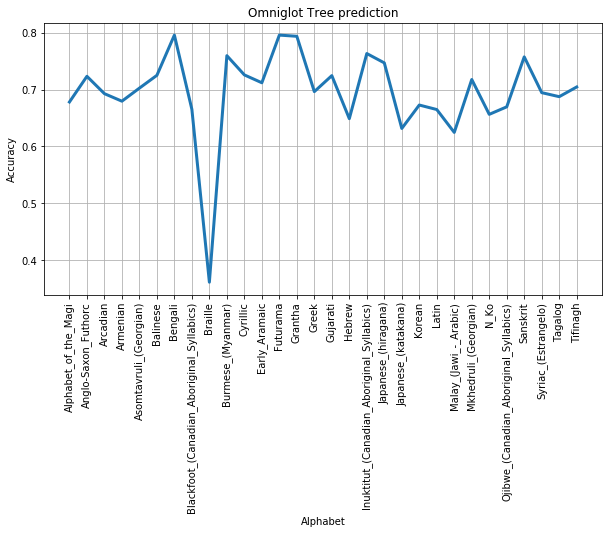

In [71]:
plt.figure(figsize=(10,5))
plt.plot(dataframe.to_numpy()[0], linewidth = 3)
plt.xlabel("Alphabet")
plt.ylabel("Accuracy")
plt.title("Omniglot Tree prediction")
plt.xticks(ticks,list(dataframe.columns),rotation=90)
plt.grid()

In [ ]:
#plot to examine data in xtrain 
#plt.figure(figsize = (15,15))
#for i in range(24):
##    plt.subplot(4,8,i+1)
#    plt.axis('off')
#    plt.imshow(Xtrain[i].reshape(105,105))
#    #plt.title(classes[ytrain[i]])
#    plt.title(F_name[i])

In [ ]:
#Dicty = {keys: [] for keys in os.listdir(train_path)}
#score_list = []

In [ ]:
"""
Header = ['Scores']
try:
    with open('scores.csv') as f:
        f.close()
        f = open('scores.csv','a')
        c = csv.writer(f, lineterminator='\n')
        c.writerow(score_list)
        f.close()
except IOError:
    f = open('scores.csv', 'a') # Create file for the first time
    w = csv.writer(f, lineterminator='\n')
    w.writerow(Header)
    w.writerow(score_list)
    f.close()
    
Header2 = ['Alphabet']    
try:
    with open('alpha_name.csv') as f:
        f.close()
        f = open('alpha_name.csv','a')
        c = csv.writer(f, lineterminator='\n')
        c.writerow(Alpha_name)# Append values without header
        f.close()
except IOError:
    f = open('alpha_name.csv', 'a') # Create file for the first time
    w = csv.writer(f, lineterminator='\n')
    w.writerow(Header2)
    w.writerow(Alpha_name)
    f.close()
"""


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data.to_numpy()[0], linewidth = 3)
plt.xlabel("Alphabet")
plt.ylabel("Accuracy")
plt.title("Omniglot Tree prediction")
plt.grid()

In [72]:
np.arange(20, 100, 5)

array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])